In [43]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
DATA_INIT=pd.read_csv("scorm_tracking_copy.csv", delimiter=";")
DATA_INIT

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,589.0,8,2016-08-25 17:22:56,2016-08-25 17:32:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,6194.0,2,2016-08-25 17:27:34,2017-11-02 15:40:38,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,31203.0,11,2016-08-25 17:27:58,2017-10-27 08:21:30,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,112788.0,7,2016-08-25 17:29:27,2017-11-30 16:53:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,841.0,4,2016-08-25 17:30:45,2017-11-02 15:56:02,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27398,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,691-reseau-developpement,lesson,1.0,0.0,48.0,17,2018-12-13 11:21:20,2018-12-13 11:22:08,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27399,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,691-reseau-developpement,lesson,1.0,0.0,5.0,17,2018-12-13 11:22:13,2018-12-13 11:22:19,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1
27400,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,724-but-du-module,lesson,1.0,0.0,18.0,1,2018-12-13 11:23:33,2018-12-13 11:23:51,"{""objectives"":[{""id"":""1_introduction"",""progres...",1
27401,245656,dtic@mobiletic.com,a871e8c1-c928-4faf-8cfb-e06f0dbb99bc,724-but-du-module,lesson,1.0,0.0,3.0,1,2018-12-13 11:23:55,2018-12-13 11:23:59,"{""objectives"":[{""id"":""1_introduction"",""progres...",1


# A partir du jeu de données original, créer:

## un Dataframe comportant tous les modules en précisant l’effectif des apprenants, le nombre total de sessions, le score maximal, le score minimal, le taux de réussite (pour les apprenants des scores > 50)

## un tableau 2D Numpy avec les données des 10 tops modules selon les taux de réussites (Chaque ligne représente un module)


In [65]:
DATA_INIT['ranger']=prem(DATA_INIT['score'])
DATA_INIT['temps']=DATA_INIT['temps']/60
DATA_INIT

,id,actor,session_uuid,object_id,activity_type,progression,score,temps,total_ecrans,created,modified,learning_object,processed,ranger
0,1,ga2018_umbe@yopmail.com,session-20,694-vorstellung,lesson,1.0,100.0,9.816667,8,2016-08-25 17:22:56,2016-08-25 17:32:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,1
1,2,dtic@mobiletic.com,session-33,683-programme-nescens,lesson,1.0,0.0,103.233333,2,2016-08-25 17:27:34,2017-11-02 15:40:38,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,2
2,3,dtic@mobiletic.com,session-37,678-politique-et-cadre-legal,lesson,1.0,71.0,520.050000,11,2016-08-25 17:27:58,2017-10-27 08:21:30,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,3
3,4,dtic@mobiletic.com,session-46,671-presentation,lesson,1.0,22.0,1879.800000,7,2016-08-25 17:29:27,2017-11-30 16:53:58,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",1,4
4,5,dtic@mobiletic.com,session-52,684-informatique,lesson,1.0,0.0,14.016667,4,2016-08-25 17:30:45,2017-11-02 15:56:02,"{""learner_id"":"""",""progress_measure"":""1.00"",""co...",0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27398,245637,dtic@mobiletic.com,dd0de81f-1cfd-4f02-9e99-1fc730e66ccb,691-reseau-developpement,lesson,1.0,0.0,0.800000,17,2018-12-13 11:21:20,2018-12-13 11:22:08,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1,27399
27399,245650,dtic@mobiletic.com,4da3228a-9a0b-42ab-a6ce-d93b2ed99b91,691-reseau-developpement,lesson,1.0,0.0,0.083333,17,2018-12-13 11:22:13,2018-12-13 11:22:19,"{""location"":""home"",""suspend_data"":""viewed=cdg,...",1,27400
27400,245654,dtic@mobiletic.com,fcd48e54-b0b9-4ea7-99f2-4189031199fa,724-but-du-module,lesson,1.0,0.0,0.300000,1,2018-12-13 11:23:33,2018-12-13 11:23:51,"{""objectives"":[{""id"":""1_introduction"",""progres...",1,27401
27401,245656,dtic@mobiletic.com,a871e8c1-c928-4faf-8cfb-e06f0dbb99bc,724-but-du-module,lesson,1.0,0.0,0.050000,1,2018-12-13 11:23:55,2018-12-13 11:23:59,"{""objectives"":[{""id"":""1_introduction"",""progres...",1,27402


In [44]:
actor=DATA_INIT.groupby('object_id').actor.nunique()
# actor

In [45]:
session_id=DATA_INIT.groupby('object_id').session_uuid.count()
# session_id

In [50]:
score_min=DATA_INIT.groupby('object_id').score.min()
# score_min

In [51]:
score_max=DATA_INIT.groupby('object_id').score.max()
# score_max

In [52]:
DATAFRAME_MODULE=pd.DataFrame({'actor':actor,'session_uuid':session_id,'score_min':score_min,'score_max':score_max})
#DATAFRAME_MODULE

In [53]:
SCORE_SUP=DATA_INIT[DATA_INIT['score' ] >=50]
#SCORE_SUP

In [54]:
nbre_reussite=SCORE_SUP.groupby(['object_id','actor']).score.max()
nbre_reussite=nbre_reussite.reset_index()

In [55]:
nbre_r=nbre_reussite.groupby('object_id').score.count()
taux_reussite=(nbre_r/actor)*100
taux_reussite.sort_values(ascending = False)

object_id
752-etudes-de-cas-et-questions                   99.186992
734-risques-psychosociaux                        98.387097
819-informatique                                 98.305085
755-verhalten-des-mitarbeitenden                 97.872340
761-fallstudien-und-fragen                       97.752809
                                                   ...    
816-krankheits-und-unfallbedingte-abwesenheit          NaN
818-nescens                                            NaN
820-formation                                          NaN
823-nescens                                            NaN
824-nescens                                            NaN
Length: 152, dtype: float64

In [56]:
DATAFRAME_MODULE['taux_reussite']=taux_reussite
#DATAFRAME_MODULE

In [57]:
DATAFRAME_MODULE['taux_reussite']=DATAFRAME_MODULE['taux_reussite'].fillna(0)
#DATAFRAME_MODULE

In [63]:
TRI_MODULE=DATAFRAME_MODULE.sort_values(by='taux_reussite', ascending=False)
#TRI_MODULE

In [64]:
TOP10_MODULE=TRI_MODULE.head(10)
#TOP10_MODULE

In [103]:
numpy2D=np.array([TOP10_MODULE])
#numpy2D

# Pour le top module et le dernier:

## créer un Dataframe avec les données résumées de chaque apprenants: nombre total de sessions, nombre total de temps, score, resultat final (de valeur 0 si score < 50 et 1 sinon)


In [104]:
CAL=TOP10_MODULE.iloc[0,:]
#CAL

In [105]:
CALL=TOP10_MODULE.iloc[-1,:]
#CALL

In [106]:
PRIN_TOP=DATA_INIT[['object_id','actor','session_uuid','score','temps']]
#PRIN_TOP

In [107]:
premier=PRIN_TOP.loc[(PRIN_TOP['object_id']=='752-etudes-de-cas-et-questions'),:]
# premier

In [108]:
premier_score=premier.groupby(['actor']).score.max()
premier_temps=premier.groupby(['actor']).temps.sum()
premier_session=premier.groupby(['actor']).session_uuid.count()

In [186]:
 premier_top=pd.DataFrame({'session':premier_session,'score':premier_score,'temps':premier_temps})
# premier_top

In [28]:
def prem(l):
    i=1
    liste=[]
    for e in l:
        liste.append(i)
        i=i+1
        
    return liste
        

In [111]:
# premiertop_tri=premier_top.sort_values(by='score',ascending=False)
# premiertop_tri 
# premiertop_tri=premier_top

In [187]:
 premiertop_tri['ranger']=prem(premiertop_tri['score'])
# premiertop_tri

In [188]:
premiertop_tri['resultat'] =0
premiertop_tri.loc[premiertop_tri['score']>=50,'resultat']=1
#premiertop_tri

In [189]:
 premiertop_tri['temps']=premiertop_tri['temps']/60
# premiertop_tri

In [115]:
# DF=premiertop_tri.sort_values(['temps'])

# x=DF['temps']
# y=DF['score']

In [116]:
# plt.plot(DF['temps'].to_numpy(), DF['score'].to_numpy())

In [117]:
# plt.plot(premiertop_tri['ranger'])

In [118]:
dernier=PRIN_TOP.loc[(PRIN_TOP['object_id']=='736-conge-non-paye'),:]     
#dernier

In [119]:
dernier_score=dernier.groupby(['actor']).score.max()
dernier_temps=dernier.groupby(['actor']).temps.sum()
dernier_session=dernier.groupby(['actor']).session_uuid.count()

In [120]:
dernier_top=pd.DataFrame({'session':dernier_session,'score':dernier_score,'temps':dernier_temps})
#dernier_top

In [121]:
dernier_top['resultat'] =0 
dernier_top.loc[dernier_top['score']>=50,'resultat']=1
# dernier_top

In [122]:
 dernier_top['temps']=dernier_top['temps']/60
# dernier_top.sort_values(by='temps',ascending=True)

In [123]:
deux2=TOP10_MODULE.iloc[1,:]
#deux2

In [124]:
deuxième=PRIN_TOP.loc[(PRIN_TOP['object_id']=='734-risques-psychosociaux'),:]
#deuxième

In [125]:
deuxième_score=deuxième.groupby(['actor']).score.max()
deuxième_temps=deuxième.groupby(['actor']).temps.sum()
deuxième_session=deuxième.groupby(['actor']).session_uuid.count()

In [126]:
deuxième_top=pd.DataFrame({'session':deuxième_session,'score':deuxième_score,'temps':deuxième_temps})
#deuxième_top

In [127]:
deuxièmetop_tri=deuxième_top.sort_values(by='score',ascending=False)
#deuxièmetop_tri

In [128]:
deuxièmetop_tri['ranger']=prem(deuxièmetop_tri['score'])
#deuxièmetop_tri

In [129]:
deuxièmetop_tri['resultat'] =0 
deuxièmetop_tri.loc[deuxièmetop_tri['score']>=50,'resultat']=1
#deuxièmetop_tri

In [130]:
# deuxièmetop_tri['temps']=deuxièmetop_tri['temps']/60
# deuxièmetop_tri.sort_values(by='temps',ascending=True)

In [131]:
trois2=TOP10_MODULE.iloc[2,:]
#trois2

In [132]:
trois=PRIN_TOP.loc[(PRIN_TOP['object_id']=='819-informatique'),:]
#trois

In [133]:
trois_score=trois.groupby(['actor']).score.max()
trois_temps=trois.groupby(['actor']).temps.sum()
trois_session=trois.groupby(['actor']).session_uuid.count()

In [134]:
trois_top=pd.DataFrame({'session':trois_session,'score':trois_score,'temps':trois_temps})
#trois_top

In [135]:
troistop_tri=trois_top.sort_values(by='score',ascending=False)
#troistop_tri

In [136]:
troistop_tri['ranger']=prem(troistop_tri['score'])
#troistop_tri

In [137]:
troistop_tri['resultat'] =0 
troistop_tri.loc[troistop_tri['score']>=50,'resultat']=1
#troistop_tri

In [138]:
trois_top['temps']=trois_top['temps']/60
#trois_top.sort_values(by='temps',ascending=True)

In [139]:
quatre3=TOP10_MODULE.iloc[3,:]
#quatre3

In [140]:
quatre=PRIN_TOP.loc[(PRIN_TOP['object_id']=='755-verhalten-des-mitarbeitenden'),:]
#quatre

In [141]:
quatre_score=quatre.groupby(['actor']).score.max()
quatre_temps=quatre.groupby(['actor']).temps.sum()
quatre_session=quatre.groupby(['actor']).session_uuid.count()

In [142]:
quatre_top=pd.DataFrame({'session':quatre_session,'score':quatre_score,'temps':quatre_temps})
#quatre_top

In [143]:
quatre_top['resultat'] =0 
quatre_top.loc[quatre_top['score']>=50,'resultat']=1
#quatre_top

In [144]:
quatre_top['temps']=quatre_top['temps']/60
#quatre_top.sort_values(by='temps',ascending=True)

In [145]:
cinq4=TOP10_MODULE.iloc[4,:]
#cinq4

In [146]:
cinq=PRIN_TOP.loc[(PRIN_TOP['object_id']=='761-fallstudien-und-fragen'),:]
#cinq

In [147]:
cinq_score=cinq.groupby(['actor']).score.max()
cinq_temps=cinq.groupby(['actor']).temps.sum()
cinq_session=cinq.groupby(['actor']).session_uuid.count()

In [148]:
cinq_top=pd.DataFrame({'session':cinq_session,'score':cinq_score,'temps':cinq_temps})
#cinq_top

In [149]:
cinq_top['resultat'] =0 
cinq_top.loc[cinq_top['score']>=50,'resultat']=1
#cinq_top

In [150]:
cinq_top['temps']=cinq_top['temps']/60
#cinq_top.sort_values(by='temps',ascending=True)

In [151]:
six5=TOP10_MODULE.iloc[5,:]
#six5

In [152]:
six=PRIN_TOP.loc[(PRIN_TOP['object_id']=='765-urlaub'),:]
#six

In [153]:
six_score=six.groupby(['actor']).score.max()
six_temps=six.groupby(['actor']).temps.sum()
six_session=six.groupby(['actor']).session_uuid.count()

In [154]:
six_top=pd.DataFrame({'session':six_session,'score':six_score,'temps':six_temps})
#six_top

In [155]:
six_top['resultat'] =0 
six_top.loc[six_top['score']>=50,'resultat']=1
#six_top

In [156]:
six_top['temps']=six_top['temps']/60
#six_top.sort_values(by='temps',ascending=True)

In [157]:
sept6=TOP10_MODULE.iloc[6,:]
#sept6

In [158]:
sept=PRIN_TOP.loc[(PRIN_TOP['object_id']=='766-unbezahlter-urlaub'),:]
#sept

In [159]:
sept_score=sept.groupby(['actor']).score.max()
sept_temps=sept.groupby(['actor']).temps.sum()
sept_session=sept.groupby(['actor']).session_uuid.count()

In [160]:
sept_top=pd.DataFrame({'session':sept_session,'score':sept_score,'temps':sept_temps})
#sept_top

In [161]:
sept_top['resultat'] =0 
sept_top.loc[sept_top['score']>=50,'resultat']=1
#sept_top

In [162]:
sept_top['temps']=sept_top['temps']/60
#sept_top.sort_values(by='temps',ascending=True)

In [163]:
huit7=TOP10_MODULE.iloc[7,:]
#huit7

In [164]:
huit=PRIN_TOP.loc[(PRIN_TOP['object_id']=='729-salaire'),:]
#huit

In [165]:
huit_score=huit.groupby(['actor']).score.max()
huit_temps=huit.groupby(['actor']).temps.sum()
huit_session=huit.groupby(['actor']).session_uuid.count()

In [166]:
huit_top=pd.DataFrame({'session':huit_session,'score':huit_score,'temps':huit_temps})
#huit_top

In [167]:
huit_top['resultat'] =0 
huit_top.loc[huit_top['score']>=50,'resultat']=1
#huit_top

In [168]:
huit_top['temps']=huit_top['temps']/60
#huit_top.sort_values(by='temps',ascending=True)

In [169]:
neuf8=TOP10_MODULE.iloc[8,:]
#neuf8

In [170]:
neuf=PRIN_TOP.loc[(PRIN_TOP['object_id']=='747-modification-des-rapports-de-travail'),:]
#neuf

In [171]:
neuf_score=neuf.groupby(['actor']).score.max()
neuf_temps=neuf.groupby(['actor']).temps.sum()
neuf_session=neuf.groupby(['actor']).session_uuid.count()

In [172]:
neuf_top=pd.DataFrame({'session':neuf_session,'score':neuf_score,'temps':neuf_temps})
#neuf_top

In [173]:
neuf_top['resultat'] =0 
neuf_top.loc[neuf_top['score']>=50,'resultat']=1
#neuf_top

In [174]:
neuf_top['temps']=neuf_top['temps']/60
#neuf_top.sort_values(by='temps',ascending=True)

# Pour les 10 top module
représenter par une courbe ces derniers dans un même repère sur une figure unique. A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. L’ordonné est déterminé par son score maximum.


Un diagramme en bâton avec le taux de réussite de chaque module. 


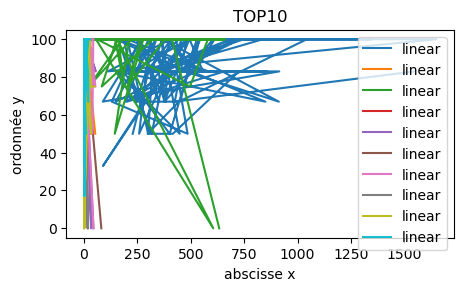

In [190]:

fig, ax = plt.subplots(figsize=(5,2.7))
ax.plot(premier_top['temps'], premier_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();  

ax.plot(dernier_top['temps'], dernier_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();  

ax.plot(deuxième_top['temps'], deuxième_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(trois_top['temps'], trois_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(quatre_top['temps'], quatre_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(cinq_top['temps'], cinq_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(six_top['temps'], six_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(sept_top['temps'], sept_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(huit_top['temps'], huit_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("top10") 
ax.legend();

ax.plot(neuf_top['temps'], neuf_top['score'], label='linear')    
ax.set_xlabel('abscisse x')  
ax.set_ylabel('ordonnée y')  
ax.set_title("TOP10") 
ax.legend();

ax.legend();

In [176]:
TOP10_MODULE['taux_reussite']

object_id
752-etudes-de-cas-et-questions              99.186992
734-risques-psychosociaux                   98.387097
819-informatique                            98.305085
755-verhalten-des-mitarbeitenden            97.872340
761-fallstudien-und-fragen                  97.752809
765-urlaub                                  97.727273
766-unbezahlter-urlaub                      97.727273
729-salaire                                 97.674419
747-modification-des-rapports-de-travail    97.580645
736-conge-non-paye                          96.721311
Name: taux_reussite, dtype: float64

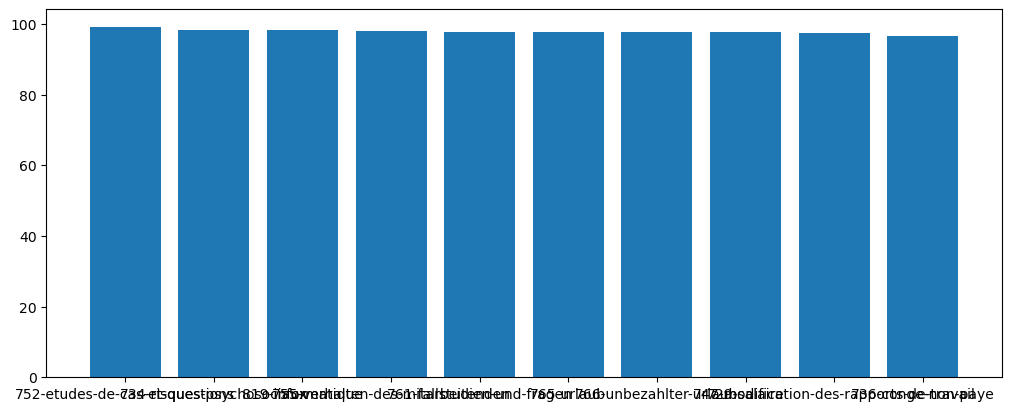

In [179]:
fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
categories = ['752-etudes-de-cas-et-questions','734-risques-psychosociaux',
              '819-informatique','755-verhalten-des-mitarbeitenden','761-fallstudien-und-fragen',
              '765-urlaub','766-unbezahlter-urlaub','729-salaire',
              '747-modification-des-rapports-de-travail','736-conge-non-paye']


ax.bar(categories, TOP10_MODULE["taux_reussite"]);

# Pour les 3 top module
représenter par une courbe chacun dans un même repère différent sur une même figure horizontalement subdivisée en trois. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. 

L’ordonné est déterminé par son score maximum.


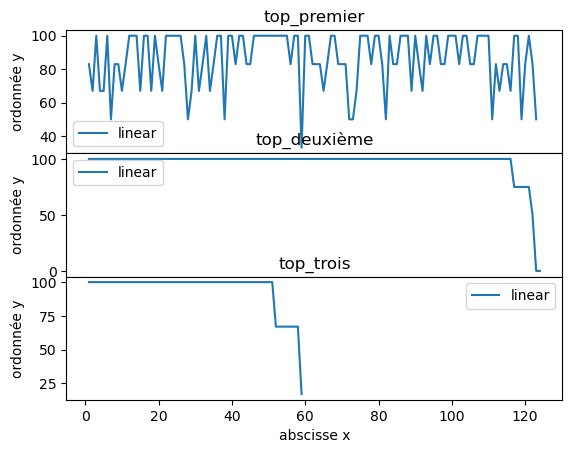

In [180]:

fig, axs = plt.subplots(3, 1, sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].plot(premiertop_tri['ranger'], premiertop_tri['score'], label='linear')    
axs[0].set_xlabel('abscisse x')  
axs[0].set_ylabel('ordonnée y')  
axs[0].set_title("top_premier") 
axs[0].legend();  

axs[1].plot(deuxièmetop_tri['ranger'], deuxièmetop_tri['score'], label='linear')    
axs[1].set_xlabel('abscisse x')  
axs[1].set_ylabel('ordonnée y')  
axs[1].set_title("top_deuxième") 
axs[1].legend();

axs[2].plot(troistop_tri['ranger'], troistop_tri['score'], label='linear')    
axs[2].set_xlabel('abscisse x')  
axs[2].set_ylabel('ordonnée y')  
axs[2].set_title("top_trois") 
axs[2].legend();



# Pour tous les modules:

## représenter l’ensemble par un nuage de points dans un même repère sur une même figure. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par le temps global sur le module.
## Un camembert avec le taux des modules catégorisés en quatre classes: 
## Classe A: taux de réussite > = 80%
## Classe B: taux de réussite > = 60%
## Classe C: taux de réussite > = 50%
## Classe D: taux de réussite < 50%


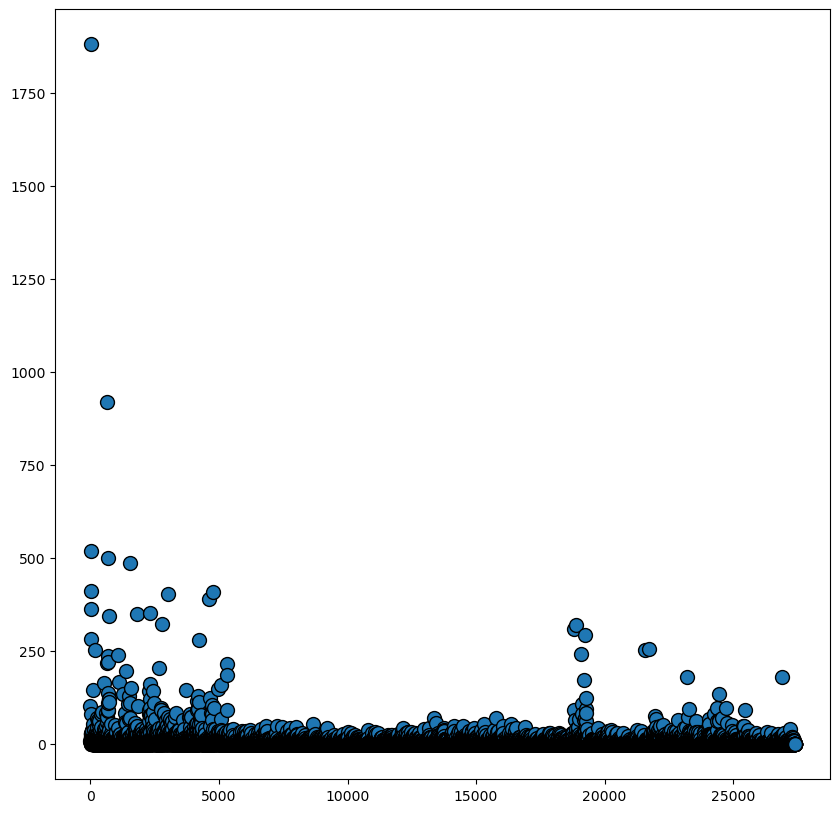

In [183]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(DATA_INIT['ranger'],DATA_INIT['temps'], s=100, facecolor='C0', edgecolor='k');

In [184]:
module_count=TRI_MODULE.size
module_count

760

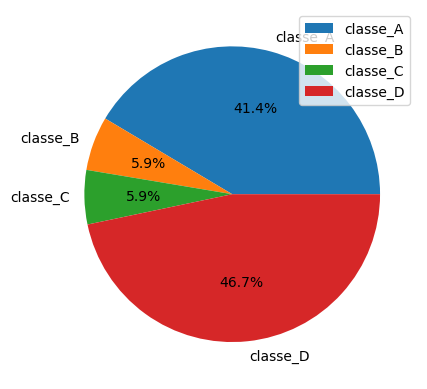

In [185]:
classe_A =TRI_MODULE.loc[TRI_MODULE['taux_reussite']>=80].size
classe_B =TRI_MODULE.loc[(TRI_MODULE['taux_reussite']>=60)&(TRI_MODULE['taux_reussite']<80)].size
classe_C =TRI_MODULE.loc[(TRI_MODULE['taux_reussite']>=50)&(TRI_MODULE['taux_reussite']<60)].size
classe_D =TRI_MODULE.loc[TRI_MODULE['taux_reussite']<50].size
classe_A=classe_A/module_count
classe_B=classe_B/module_count
classe_C=classe_C/module_count
classe_D=classe_D/module_count
classes=np.array([classe_A,classe_B,classe_C,classe_D])
classes
label=['classe_A','classe_B','classe_C','classe_D']

plt.pie(classes, labels=label,autopct='%1.1f%%')
plt.legend()
plt.show()

In [ ]:
 def moduleDATA(self,cheminDATA):
        self.DATA_INIT=pd.read_csv(cheminDATA, delimiter=";")
        return DATA_INIT

In [ ]:
def GRAPH_PI(self,TRI_MODULE):
        TOPTRI()
        module_count=self.TRI_MODULE.size
        module_count
        classe_A =self.TRI_MODULE.loc[self.TRI_MODULE['taux_reussite']>=80].size
        classe_B =self.TRI_MODULE.loc[(self.TRI_MODULE['taux_reussite']>=60)&(self.TRI_MODULE['taux_reussite']<80)].size
        classe_C =self.TRI_MODULE.loc[(self.TRI_MODULE['taux_reussite']>=50)&(self.TRI_MODULE['taux_reussite']<60)].size
        classe_D =self.TRI_MODULE.loc[TRI_MODULE['taux_reussite']<50].size
        classe_A=classe_A/module_count
        classe_B=classe_B/module_count
        classe_C=classe_C/module_count
        classe_D=classe_D/module_count
        classes=np.array([classe_A,classe_B,classe_C,classe_D])
        classes
        label=['classe_A','classe_B','classe_C','classe_D']


In [ ]:
def GRAPH_NUAGE(self,D):
        moduleDATA()
        dfi =self.moduleDATA("scorm_tracking_copy.csv").groupby('object_id').agg({'temps':'sum'})/60
        fig, ax = plt.subplots(figsize=(10, 10))
    
        dfi['rang']=[i for i in range(1,self.D.taux_reussite.size +1)]
        data =dfi.to_numpy().T
        ax.scatter(data[1],data[0], s=100, facecolor='C0', edgecolor='k');  

In [ ]:
def GRAPH_TOP3(self,object):
        moduleDATA()
   
        nbre_score= self.moduleDATA("scorm_tracking_copy.csv").loc[self.moduleDATA("scorm_tracking_copy.csv")['object_id']==object].groupby('actor').agg({'score':'max'})
        nbre_score=nbre_score.sort_values(by=['score'],ascending=False)
        nbre_score['rang']=[i for i in range(1,len(nbre_score)+1)]
        nbre_score.reset_index()
        nbre=nbre_score.to_numpy()
        y=nbre[:,0]
        x=nbre[:,1]

        return x,y
    fig,axs= plt.subplots(3,1,figsize=(10,5))

    for i in range(0,F.index.size):
        
        x,y=GRAPH_TOP3(F.index[i])
        axs[i].plot(x,y,label=F.index[i])
        axs[i].set_title(F.index[i])
        axs[i].set_xlabel('rang')
        axs[i].set_ylabel('score')

In [ ]:
def GRAPH_B(self):
        
        fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
        categories = ['752-etudes-de-cas-et-questions','734-risques-psychosociaux',
                  '819-informatique','755-verhalten-des-mitarbeitenden','761-fallstudien-und-fragen',
                  '765-urlaub','766-unbezahlter-urlaub','729-salaire',
                  '747-modification-des-rapports-de-travail','736-conge-non-paye']


        ax.bar(categories, DATATOP["taux_reussite"]);

In [ ]:
def GRAPH_TOP10(self,R):
        moduleDATA()
        plt.figure(figsize=(10,5))
        for i in range(len(R.index)):
            nbre_temps=round(self.moduleDATA("scorm_tracking_copy.csv").loc[(self.moduleDATA("scorm_tracking_copy.csv")['object_id']==R.index[i])].groupby('actor').agg({'temps':'sum'})/60,2)
            nbre_score=self.moduleDATA("scorm_tracking_copy.csv").loc[(self.moduleDATA("scorm_tracking_copy.csv")['object_id']==R.index[i])].groupby('actor').agg({'score':'max'})
            DATA_TOP10=pd.DataFrame({'score':nbre_score.score,'temps':nbre_temps.temps})
            DATA_TOP10=DATA_TOP10.sort_values(by='temps', ascending=False )
            plt.plot(DATA_TOP10['temps'],DATA_TOP10['score'],label=R.index[i])
        plt.legend()

        plt.show()
        return DATA_TOP10

In [ ]:
# DATA = moduleDAT("scorm_tracking_copy.csv")
# DATA.sort_values(by=['taux_reussite'],ascending=False, inplace=True)
# DATATOP=TOPTRI(DATA)
# F=TOPTRI(DATA)
# nump(DATATOP)
# premier= DATA.head(1)
# premier.index[0]
# D=MODULE_INFO(premier.index[0])    
# dernier= DATA.tail(1)
# dernier.index[0]
# D=MODULE_INFO(dernier.index[0])
# C= GRAPH_TOP10( DATATOP) 
# E= GRAPH_B()
# G= GRAPH_TOP3(DATATOP)
# K=GRAPH_NUAGE(DATA)

In [ ]:


#DATA.index[0]
#GRAPH_TOP10( DATATOP)  


In [ ]:
class DATAFRAME:

    def __init__ (self,cheminDATA):
        
        self.DATA_INIT=pd.read_csv(cheminDATA, delimiter=";")
        
    
    def moduleDAT(self):
        
        
        actor=self.DATA_INIT.groupby('object_id').actor.nunique()
        session_id=self.DATA_INIT.groupby('object_id').session_uuid.count()
        score_min=self.DATA_INIT.groupby('object_id').score.min()
        score_max=self.DATA_INIT.groupby('object_id').score.max()
        DATAFRAME_MODULE=pd.DataFrame({'actor':actor,'session_uuid':session_id,'score_min':score_min,'score_max':score_max})
        SCORE_SUP50=self.DATA_INIT[self.DATA_INIT['score' ] >=50]
        nbre_reussite=SCORE_SUP50.groupby(['object_id','actor']).score.max()
        nbre_reussite=nbre_reussite.reset_index()
        nbre_r=nbre_reussite.groupby('object_id').score.count()
        taux_reussite=(nbre_r/actor)*100
        taux_reussite.sort_values(ascending = False)
        DATAFRAME_MODULE['taux_reussite']=taux_reussite
        DATAFRAME_MODULE['taux_reussite']=DATAFRAME_MODULE['taux_reussite'].fillna(0)

        return  DATAFRAME_MODULE
    




    def TOPTRI10(self):
        DATAFRAME_MODULE= self.moduleDAT()
    
        TRI_MODULE=DATAFRAME_MODULE.sort_values(by='taux_reussite', ascending=False)
        TOP10_MODULE=TRI_MODULE.head(10)
        return  TOP10_MODULE
    
    
    def TOPTRI(self):
        DATAFRAME_MODULE=self.moduleDAT()
        TRI_MODULE=DATAFRAME_MODULE.sort_values(by='taux_reussite', ascending=False)
        TOP3_MODULE=TRI_MODULE.head(3)
        return  TOP3_MODULE
    
    def nump(self,T):
        
        TOP_T=T.to_numpy()
        return TOP_T
    
    
    
    def MODULE_INFO(self,object_id):
        
        
        tmp = self.DATA_INIT.loc[self.DATA_INIT.object_id==object_id].groupby('actor').agg({'session_uuid':'count','score':'max','temps':'sum'})
        tmp['resultat'] =0
        tmp.loc[tmp['score']>=50,'resultat']=1
        tmp['temps']=tmp['temps']/60

        return tmp
    

    def GRAPH_TOP10(self,R):
        
        plt.figure(figsize=(10,5))
        for i in range(len(R.index)):
            nbre_temps=round(self.DATA_INIT.loc[(self.DATA_INIT['object_id']==R.index[i])].groupby('actor').agg({'temps':'sum'})/60,2)
            nbre_score=self.DATA_INIT.loc[(self.DATA_INIT['object_id']==R.index[i])].groupby('actor').agg({'score':'max'})
            DATA_TOP10=pd.DataFrame({'score':nbre_score.score,'temps':nbre_temps.temps})
            DATA_TOP10=DATA_TOP10.sort_values(by='temps', ascending=False )
            plt.plot(DATA_TOP10['temps'],DATA_TOP10['score'],label=R.index[i])
        plt.legend()

        plt.show()
        return DATA_TOP10
    
    
    def GRAPH_B(self):
        
        fig, ax = plt.subplots(figsize=(10, 4), layout='constrained')
        categories = ['752-etudes-de-cas-et-questions','734-risques-psychosociaux',
                  '819-informatique','755-verhalten-des-mitarbeitenden','761-fallstudien-und-fragen',
                  '765-urlaub','766-unbezahlter-urlaub','729-salaire',
                  '747-modification-des-rapports-de-travail','736-conge-non-paye']


        ax.bar(categories, DATATOP["taux_reussite"]);
        
        
        
    def GRAPH_TOP3(self,object):
       
   
        nbre_score= self.DATA_INIT.loc[self.DATA_INIT['object_id']==object].groupby('actor').agg({'score':'max'})
        nbre_score=nbre_score.sort_values(by=['score'],ascending=False)
        nbre_score['rang']=[i for i in range(1,len(nbre_score)+1)]
        nbre_score.reset_index()
        nbre=nbre_score.to_numpy()
        y=nbre[:,0]
        x=nbre[:,1]

        return x,y
    
    def RAPPEL(self,F):
        
    
        fig,axs= plt.subplots(3,1,figsize=(10,5))

        for i in range(0,F.index.size):

            x,y=self.GRAPH_TOP3(F.index[i])
            axs[i].plot(x,y,label=F.index[i])
            axs[i].set_title(F.index[i])
            axs[i].set_xlabel('rang')
            axs[i].set_ylabel('score')
        
    def GRAPH_NUAGE(self):
        
        dfi =self.DATA_INIT.groupby('object_id').agg({'temps':'sum'})/60
        fig, ax = plt.subplots(figsize=(10, 10))
    
        dfi['rang']=[i for i in range(1,self.moduleDAT().taux_reussite.size +1)]
        data =dfi.to_numpy().T
        ax.scatter(data[1],data[0], s=100, facecolor='C0', edgecolor='k');  
        
        
    def GRAPH_PI(self):
        
        module_count=self.moduleDAT().size
        module_count
        classe_A =self.moduleDAT().loc[self.moduleDAT()['taux_reussite']>=80].size
        classe_B =self.moduleDAT().loc[(self.moduleDAT()['taux_reussite']>=60)&(self.moduleDAT()['taux_reussite']<80)].size
        classe_C =self.moduleDAT().loc[(self.moduleDAT()['taux_reussite']>=50)&(self.moduleDAT()['taux_reussite']<60)].size
        classe_D =self.moduleDAT().loc[self.moduleDAT()['taux_reussite']<50].size
        classe_A=classe_A/module_count
        classe_B=classe_B/module_count
        classe_C=classe_C/module_count
        classe_D=classe_D/module_count
        classes=np.array([classe_A,classe_B,classe_C,classe_D])
        classes
        label=['classe_A','classe_B','classe_C','classe_D']

        plt.pie(classes, labels=label,autopct='%1.1f%%')
        plt.legend()
        plt.show()






In [ ]:
FRAME=DATAFRAME("scorm_tracking_copy.csv")
# FRAME.moduleDAT()

In [ ]:
# FRAME.TOPTRI10()

In [ ]:
# FRAME.MODULE_INFO('828-quiz')

In [ ]:
# FRAME.GRAPH_TOP10(FRAME.TOPTRI10())

In [ ]:
# FRAME.GRAPH_B()

In [ ]:
# FRAME.GRAPH_NUAGE()

In [ ]:
# FRAME.GRAPH_PI()

In [ ]:
# FRAME.TOPTRI()

In [ ]:
# FRAME.RAPPEL(FRAME.TOPTRI())